# Airbnb Listings Analysis: Paris
### Business Context:
This project analyzes Airbnb listings in Paris to uncover insights about pricing, neighborhood trends, and host activity over time. The findings can guide property hosts and businesses in making data-driven decisions.

### Objectives:
- Identify popular neighborhoods and their average listing prices.
- Analyze trends in host activity and pricing over time.
- Provide actionable recommendations for pricing and location strategy.

---


In [21]:
# Import pandas library
import pandas as pd

# Load the Airbnb listings dataset
listings = pd.read_csv(r"C:\Users\Pankaj Yadav\OneDrive\Desktop\Portfolio Projects\Python Projects\Airbnb Data\Listings.csv", encoding = "ISO-8859-1", low_memory = False)

# Display the first 5 rows of the dataset to understand its structure
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Data Description:
The dataset contains detailed information about Airbnb listings, including:
- **Host Information**: Host activity and joining dates.
- **Listing Details**: Neighborhood, price, and accommodations.
- **Temporal Trends**: Data to analyze changes over tieded]


In [22]:
# Get a summary of the dataset, including column data types and missing values
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [23]:
# Convert the 'host_since' column to datetime format for time-based analysis
listings["host_since"] = pd.to_datetime(listings["host_since"])

# Verify the changes in the dataset structure after the conversion
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [24]:
# Filter the dataset for listings in Paris and select relevant columns for analysis
paris_listings = (
    listings
    .query("city == 'Paris'")  # Keep rows where the city is Paris
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]  # Select columns of interest
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [25]:
# Count the number of missing values in each column of the Paris listings dataset
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [26]:
# Remove rows with missing values to ensure data consistency
paris_listings = paris_listings.dropna()

In [27]:
# Verify that there are no remaining missing values in the dataset
paris_listings.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [28]:
# Generate summary statistics for the numerical columns in the dataset
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [29]:
# Identify listings with zero price and zero accommodations, which might be outliers or data errors
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [30]:
# Group the Paris listings by neighborhood and calculate average price and accommodations
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")  # Group by the 'neighbourhood' column
    .agg({"price" : "mean"})  # Compute mean price and accommodations
    .sort_values("price")   # Sort neighborhoods by average price in descending order
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955


In [31]:
# Analyze average prices for different accommodation capacities in the 'Elysee' neighborhood
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")  # Filter for listings in the Elysee neighborhood
    .groupby("accommodates")  # Group by accommodation capacity
    .agg({"price" : "mean"})  # Calculate the mean price for each capacity
    .sort_values("price")  # Sort by average price in descending order
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [32]:
# Analyze the number of new hosts and average prices over time (yearly)
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")  # Set the 'host_since' column as the index
    .resample("YE")  # Resample data by year-end
    .agg({
        "neighbourhood": "count",
        "price":"mean"
    })  # Count new hosts and compute mean price
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


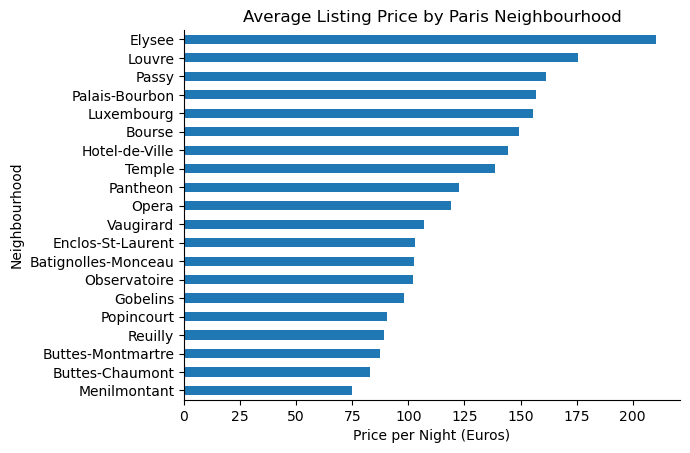

In [33]:
import seaborn as sns

# Create a horizontal bar chart showing average listing price by neighborhood
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price per Night (Euros)",
     ylabel="Neighbourhood",
     legend=None
 )
)

# Remove the top and right spines for a cleaner look
sns.despine()

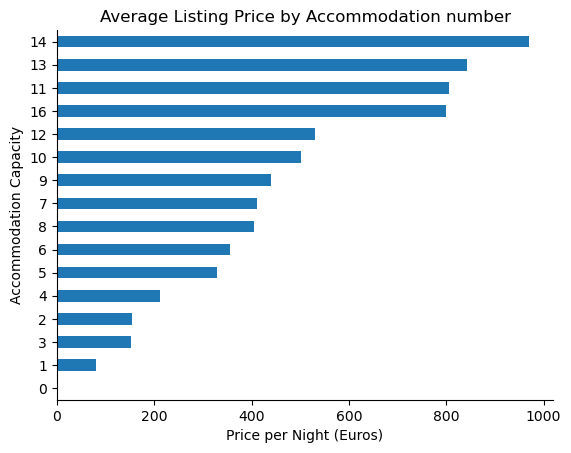

In [34]:
# Create a horizontal bar chart showing average listing price by accommodation number
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Accommodation number",
     xlabel="Price per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend=None
 )
)

# Remove the top and right spines for a cleaner look
sns.despine()

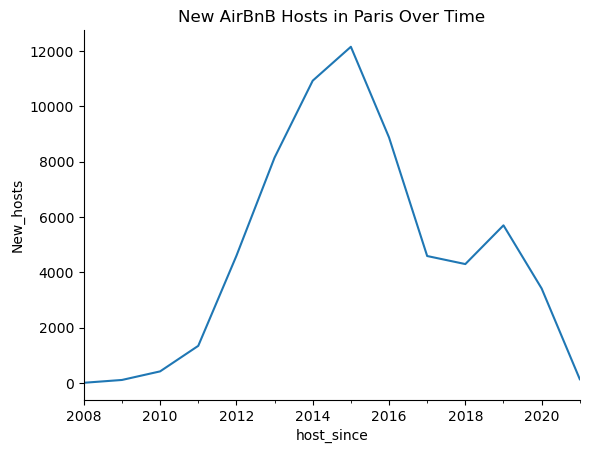

In [35]:
# Plot the number of new Airbnb hosts in Paris over time
# 'neighbourhood' column represents the count of new hosts per year
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New_hosts",
    title="New AirBnB Hosts in Paris Over Time",
)

# Remove the top and right spines for a cleaner look
sns.despine()

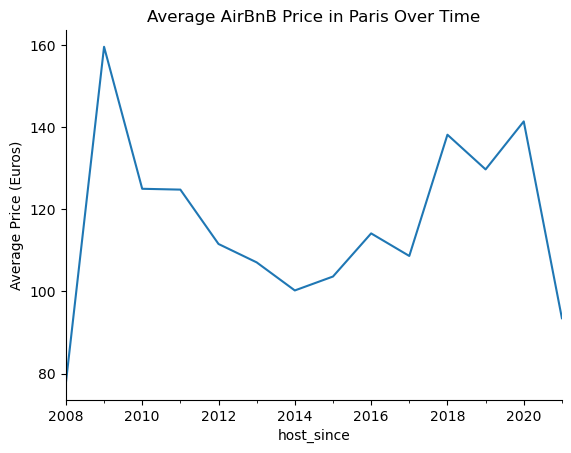

In [36]:
# Plot the average Airbnb price in Paris over time
# 'price' column represents the mean price of listings per year
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnB Price in Paris Over Time",
)

# Remove the top and right spines for a cleaner look
sns.despine()

Text(0.5, 1.0, '2015 Regulations Leads to Fewer New Hosts, Higher Prices')

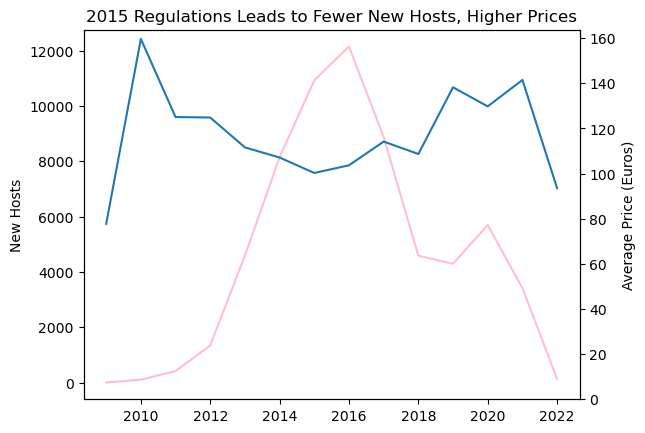

In [37]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Create a figure and axis objects for the plot
fig, ax = plt.subplots()

# Plot the number of new hosts over time on the first y-axis
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

# Label the first y-axis
ax.set_ylabel("New Hosts")  

# Create a second y-axis to plot average price
ax2 = ax.twinx()   # Create a twin y-axis sharing the same x-axis

# Plot the average price over time on the second y-axis
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)

# Ensure the second y-axis starts at 0 for better scale comparison
ax2.set_ylim(0,)  

# Label the second y-axis with currency
ax2.set_ylabel("Average Price (Euros)")  

# Add a title to describe the insights from the plot
ax.set_title("2015 Regulations Leads to Fewer New Hosts, Higher Prices")


## Conclusion:
Based on the analysis:
- **Popular Neighborhoods**: The neighborhoods with the highest listing prices and demand have been identified.
- **Temporal Trends**: The growth in new hosts and pricing trends over time reveal market dynamics.
- **Recommendations**:
  1. Optimize pricing strategies for specific neighborhoods.
  2. Target high-demand areas for new property investcisions.
